In [1]:
import numpy as np
import pandas as pd
import math
import itertools
from sklearn.metrics import DistanceMetric
from sklearn.metrics import pairwise_distances
import networkx as nx
from numpy import inf


In [2]:
'equation for adjacency'
def equation(matrix_dist):
    s = 0.1
    function = np.exp((- matrix_dist ** 2) / (2. * s ** 2))
    np.fill_diagonal(function, 0)
    return function  

In [3]:
def CSVToGraphAndAdjecency(csv) :
    
    # Uploading the file
    file=open(csv)
    df = pd.read_csv(file)
    
    # Original dataset
    print('original dataset:')
    print(df.head())
    
    # Converting to categorized type of DataFrame
    df = convert(df, 2,12)
    df_cluster = df.iloc[:,0:11]
    
    # Converted dataset
    print('converted dataset:')
    print(df_cluster.head())
    
    # Creating a distance matrix
    dist = DistanceMetric.get_metric('euclidean')
    matrix_dist = dist.pairwise(df_cluster.to_numpy())
    
    # Distance matrix
    print('distance matrix:')
    print(matrix_dist)
    
    # Creating an adjecency matrix
    adjacency_matrix = equation(matrix_dist)
    
    # Adjacency matrix
    print('adjacency matrix:')
    print(adjacency_matrix)
    
    return df_cluster, matrix_dist, adjacency_matrix

In [4]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [5]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

In [6]:
csv="Flu_Classification.csv"
df_cluster, matrix_dist, adjacency_matrix = CSVToGraphAndAdjecency(csv)

original dataset:
    Age  Temperature Sex Diarrhea    Fever Coughing ShortnessOfBreath  \
0  67.0        38.11   F  unknown      Yes      Yes           unknown   
1  29.0         0.00   M  unknown  unknown  unknown           unknown   
2  22.0         0.00   F  unknown  unknown  unknown           unknown   
3  20.0        36.56   F  unknown      Yes      Yes           unknown   
4  21.0         0.00   M  unknown  unknown  unknown           unknown   

  SoreThroat NauseaVomitting  Fatigue   Cancer Diagnosis  
0         No         unknown       No  unknown      H1N1  
1    unknown         unknown  unknown  unknown      H1N1  
2    unknown         unknown  unknown  unknown      H1N1  
3         No         unknown      Yes  unknown      H1N1  
4    unknown         unknown  unknown  unknown      H1N1  
converted dataset:
    Age  Temperature  Sex  Diarrhea  Fever  Coughing  ShortnessOfBreath  \
0  67.0        38.11    0         2      1         1                  2   
1  29.0         0.00

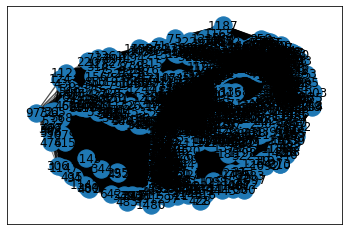

In [7]:
Graph=nx.from_numpy_matrix(matrix_dist)
draw_graph(Graph)

In [8]:
# Creating Degree Matrix, Laplacian Matrix, printing the eigenvalues and eigenvectors

def bigFucntion(G, adj_matrix) :
    
    degrees = [val for (node, val) in Graph.degree()]
    
    # Degree matrix
    D = np.zeros((len(degrees), len(degrees)))
    np.fill_diagonal(D, degrees)
    print('degree matrix:')
    print(D)
    
    # laplacian matrix
    L = D - adj_matrix
    print('laplacian matrix:')
    print(L)
    
    # Normalised laplacian matrix
    LN = np.power(D,-0.5)* L* np.power(D,-0.5)
    print('normalised laplacian matrix:')
    print(LN)
    
    # Eigenvalues and Eigenvectors
    e, v = np.linalg.eig(LN)
    e = e.real
    v = v.real
    
    print('eigenvalues:')
    print(e)
    
    print('eigenvectors:')
    print(v)
    
    return D, L, LN, e, v

In [9]:
DegreeMatrix, LaplacianMatrix, NormalizedLaplacianMatrix, e, v = bigFucntion(Graph, adjacency_matrix)

degree matrix:
[[1484.    0.    0. ...    0.    0.    0.]
 [   0. 1483.    0. ...    0.    0.    0.]
 [   0.    0. 1483. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1484.    0.    0.]
 [   0.    0.    0. ...    0. 1484.    0.]
 [   0.    0.    0. ...    0.    0. 1484.]]
laplacian matrix:
[[ 1.48400000e+003  0.00000000e+000  0.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  1.48300000e+003  0.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  1.48300000e+003 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 ...
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...  1.48400000e+003
  -1.92874985e-022 -3.69388307e-196]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ... -1.92874985e-022
   1.48400000e+003 -1.38389653e-087]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ... -3.69388307e-196
  -1.38389653e-087  1.48400000e+003]]


C:\Users\eveli\AppData\Local\Temp\ipykernel_7580\2828159536.py:19: RuntimeWarning: divide by zero encountered in power
  LN = np.power(D,-0.5)* L* np.power(D,-0.5)
C:\Users\eveli\AppData\Local\Temp\ipykernel_7580\2828159536.py:19: RuntimeWarning: invalid value encountered in multiply
  LN = np.power(D,-0.5)* L* np.power(D,-0.5)


normalised laplacian matrix:
[[  1.  nan  nan ...  nan  nan  nan]
 [ nan   1.  nan ...  nan  nan  nan]
 [ nan  nan   1. ...  nan  nan  nan]
 ...
 [ nan  nan  nan ...   1. -inf -inf]
 [ nan  nan  nan ... -inf   1. -inf]
 [ nan  nan  nan ... -inf -inf   1.]]


LinAlgError: Array must not contain infs or NaNs